##   PROJECT 2: FRAUDULENT CREDIT CARDS TRANSACTIONS  <p align="center"> </p>


## Context
A bank is interested in providing higher quality customer service to protect customers financial
assets. The bank has been receiving several complaints about credit card frauds from their
customers and the news media is regularly reporting about how the bank's customers are losing
large amounts of money and the bank is doing nothing to stop it. This is impacting both the
customers experience and their market share. The Senior Management is asking for a deep dive
into this issue.
You just got hired as the Business Analyst for the bank, and they provided you with 6 months of
available data (step 0 to 179 refer to the dates). They want you to share some insights using the
features in the file to determine if you can see a pattern for the fraudulent transactions. They are
expecting you to provide some suggestions on how to tackle the problem.


## Questions
1. Show a summary of the variable you are studying (target variable). Plot the most
appropriate graph to represent this data
2. Calculate summary statistics from the data
3. Calculation of daily trends of transactions for different categories of variables
4. What are your thoughts on the fraudulent transactions? Is there a threshold of the
spent? Is there a specific ‘gender’ with a higher probability to be the victim of a
fraudulent act? or ‘category’ of transactions with higher chance to be fraudulent?
5. What are your recommendations to the bank's management and describe how
your solution will help regain trust from customers?
6. Any other data that you would ask the team to provide? Why?

## I- Data Cleaning

In [34]:
# Importing our librairies
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import chi2_contingency
import datetime as dt 
sns.set()
plt.style.use('ggplot')

### Data understanding

In [35]:
# Loading our dataset 
customer_data = pd.read_csv('../BI Project 2/dataset/bs140513_032310.csv')
customer_data1 = pd.read_csv('../BI Project 2/dataset/bsNET140513_032310.csv')

In [36]:
customer_data.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


We can see a lot of the data in our dataset that are in quotations marks,We will remove it by creating a function to automate the process

In [37]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [38]:
def remove_quotes (df,list1) :
    '''
    This function allows us to remove the quotations marks in the data.
    @df The dataset
    @list1 The list of the columns we will remove the variable
    '''
    try :
         for i in list1 :
            y = pd.DataFrame(df[i].str.split("'",2).tolist(),columns= ['l','age','l']) 
            y = y.iloc[:,[1]]
            df[i] = y 
            y= 0
    except (KeyError , AssertionError , ValueError):
        customer_data = pd.read_csv('../BI Project 2/dataset/bs140513_032310.csv')
        

 

## II- Data Transformation for analysis

In [64]:
def age_buckets(x):
    ''' Function created to categorize Age 
    '''
    if x == '0':
        return '18(-)' 
    elif x == '1' :
        return '19-25' 
    elif x == '2':
        return '26-35'
    elif x =='3':
        return '36-45'
    elif x == '4': 
        return '46-55' 
    elif x == '5': 
        return '56-65'
    elif x == '6': 
        return '65(+)'
    else :
        return 'Unknown'

customer_data['Agegroup'] = customer_data.age.apply(age_buckets)


In [40]:
remove_quotes(df = customer_data, list1 = ['customer','age','gender','zipcodeOri','merchant','zipMerchant','category'])

In [65]:
customer_data

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,Agegroup
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0,46-55
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0,26-35
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0,46-55
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0,36-45
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0,56-65
...,...,...,...,...,...,...,...,...,...,...,...
594638,179,C1753498738,3,F,28007,M1823072687,28007,es_transportation,20.53,0,36-45
594639,179,C650108285,4,F,28007,M1823072687,28007,es_transportation,50.73,0,46-55
594640,179,C123623130,2,F,28007,M349281107,28007,es_fashion,22.44,0,26-35
594641,179,C1499363341,5,M,28007,M1823072687,28007,es_transportation,14.46,0,56-65


In [42]:
customer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
 10  Agegroup     594643 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 49.9+ MB


## III- Exploratory Data Analysis 

### 1- Show a summary of the variable you are studying (target variable).Plot the most appropriate graph to represent this data.


In [43]:
fraud = customer_data['fraud'].value_counts().to_frame()
fraud['Percent'] = customer_data['fraud'].value_counts(normalize = True).to_frame()
fraud

,fraud,Percent
0,587443,0.987892
1,7200,0.012108


In [44]:
def generate_barchart(data, title ="",abs_value ="Total",rel_value="Percent",figsize =(15,6)):
    '''
    This function will help us generate bar chart with data label
    '''
    plt.figure(figsize=figsize)
    axes = sns.barplot(data=data,x=data.index,y=abs_value)
    i=0
    for tot, perc in zip(data[abs_value],data[rel_value]):
        axes.text(i ,
                tot/2,
                str(np.round(perc*100,2))+ "%",
                fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
                )
        axes.text(i,
                tot+ 3,
                str(tot),
                fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
                )
        
        i+=1
    plt.title(title)
    sns.despine(left=True, bottom=True)
    change_width(axes,0.35)
    plt.show()


In [45]:
def change_width(ax, new_value) :
    '''
    This function is created to improve the looks of our barchart
    '''
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

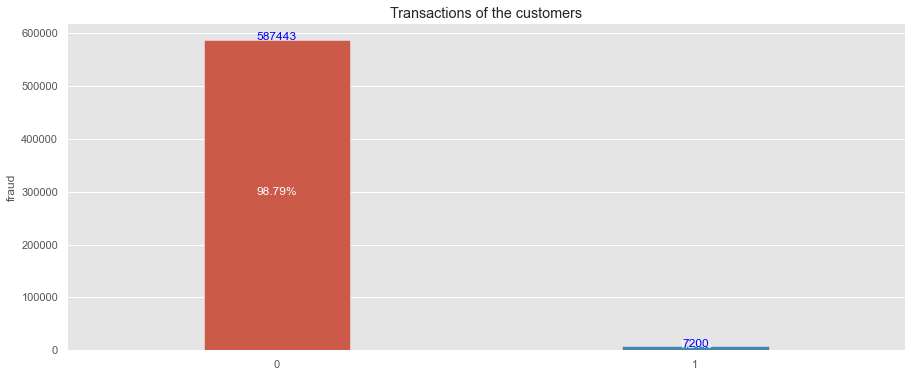

In [46]:
generate_barchart(fraud,title = 'Transactions of the customers', abs_value="fraud", rel_value="Percent")

This bar Chart shows us the percentage transactions of the customers that are fraud or not.

In [47]:
customer_data[['amount','fraud']].describe()

,amount,fraud
count,594643.000000,594643.000000
mean,37.890135,0.012108
std,111.402831,0.109369
min,0.000000,0.000000
25%,13.740000,0.000000
50%,26.900000,0.000000
75%,42.540000,0.000000
max,8329.960000,1.000000


#### Correlation table between Amount and Fraud

<AxesSubplot:>

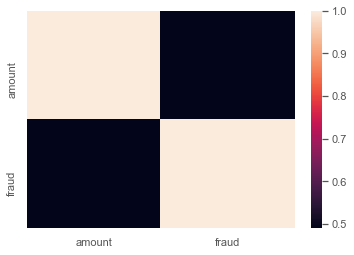

In [48]:
customer_data[['amount','fraud']].corr()
sns.heatmap(customer_data[['amount','fraud']].corr())

 ### 2 - Summary Descriptive of our data.

count    587443.000000
mean         31.847230
std          31.470876
min           0.000000
25%          13.590000
50%          26.610000
75%          41.895000
max        2144.860000
Name: amount, dtype: float64

(0.0, 500.0)

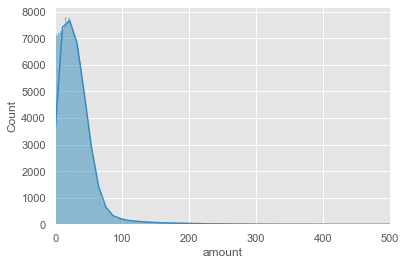

In [70]:
#Creating a Graph for the non fraudulent transactions
m = customer_data[ customer_data['fraud'] == 0]
display(m['amount'].describe())
sns.histplot(m['amount'], kde=  True)
plt.xlim(0,500)

count    7200.000000
mean      530.926551
std       835.587112
min         0.030000
25%       159.980000
50%       319.175000
75%       548.977500
max      8329.960000
Name: amount, dtype: float64

(0.0, 2000.0)

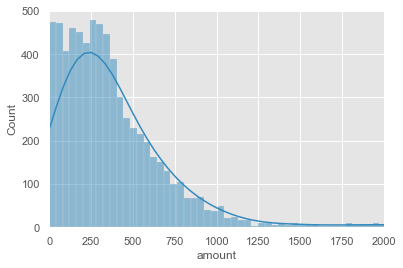

In [78]:
#Creating a graph for the fraudulent transactions
v = customer_data[ customer_data['fraud'] == 1]
display(v['amount'].describe())
sns.histplot(v['amount'], kde=  True)
plt.xlim(0,2000)

In [50]:
result = customer_data.pivot_table(values = 'amount', index = 'step', columns = 'category', aggfunc= 'sum').fillna(0)
print('Summary of the amount of transactions money by category')
display(result.describe())


Summary of the amount of transactions money by category


category,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel,es_wellnessandbeauty
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1538.761333,219.025556,2354.513944,5406.924500,12155.441722,1827.901667,1992.173611,1557.375722,800.926333,688.466389,4796.069722,1592.481167,75650.513667,9101.654944,5490.568222
std,563.072767,118.987933,650.868303,1978.789009,2969.133758,1015.660240,1285.622661,515.777981,730.832379,628.138340,1736.167189,719.369723,8243.757436,6829.480416,991.187602
min,361.130000,0.000000,1165.640000,1031.260000,4899.570000,200.930000,216.610000,708.290000,0.000000,0.000000,1215.510000,298.290000,54725.110000,0.000000,3012.990000
25%,1086.510000,141.482500,1866.025000,4007.232500,9920.297500,1039.920000,1039.215000,1163.565000,57.495000,192.617500,3558.680000,1055.935000,70260.737500,4111.985000,4729.617500
50%,1451.195000,201.130000,2290.300000,5492.335000,12270.435000,1658.840000,1768.565000,1507.205000,652.000000,476.070000,4829.320000,1424.335000,77902.605000,7980.745000,5401.095000
75%,1952.827500,288.810000,2754.445000,7177.185000,14041.247500,2396.810000,2675.187500,1886.800000,1278.757500,1015.880000,5926.812500,2117.935000,82360.032500,14137.452500,6113.942500
max,2892.710000,601.600000,4637.350000,9068.200000,20604.690000,5096.480000,7239.780000,3137.730000,4227.010000,2743.470000,11863.360000,3687.720000,87120.510000,31991.210000,8825.650000


In [51]:
def prob_category(data=customer_data,col="category", abs_value ="Total",rel_value ="Percent",show_plot=False, title=""):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = customer_data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1)
   else:
     result = pd.concat([res1,res2],axis=1)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =(15,6))
     return result

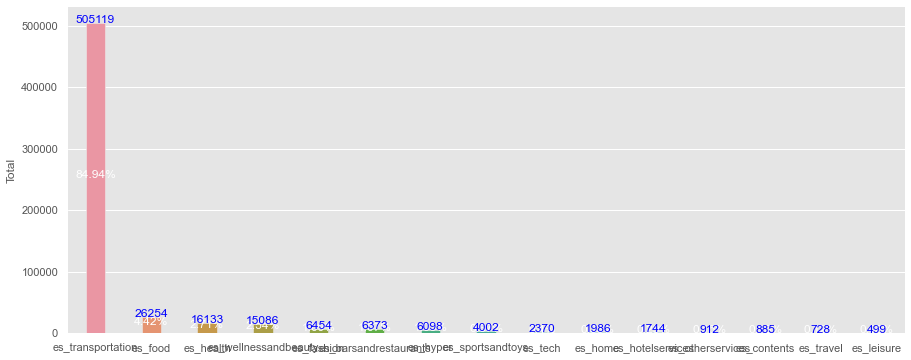

,Total,Percent
es_transportation,505119,0.849449
es_food,26254,0.044151
es_health,16133,0.027131
es_wellnessandbeauty,15086,0.025370
es_fashion,6454,0.010854
es_barsandrestaurants,6373,0.010717
es_hyper,6098,0.010255
es_sportsandtoys,4002,0.006730
es_tech,2370,0.003986
es_home,1986,0.003340


In [52]:
prob_category(customer_data, col= "category",show_plot=True)

#### 4- Victims of fraudulent transactions ?

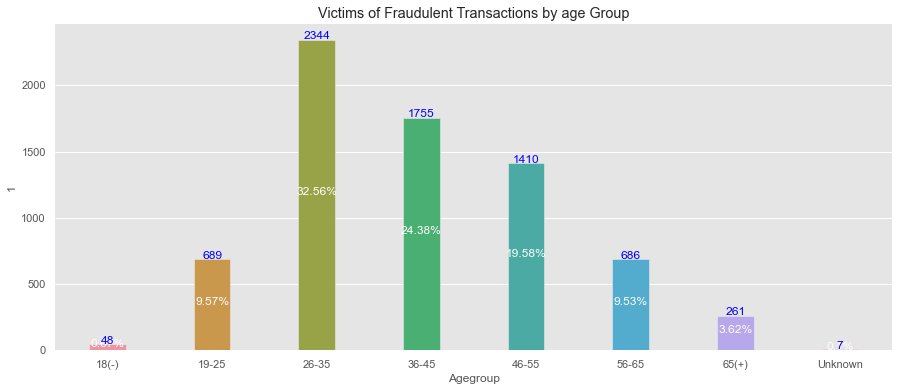

In [68]:
age_table = pd.crosstab(customer_data.Agegroup, customer_data.fraud)
age_table['Percent']  = age_table[1]/7200
age_table
generate_barchart(age_table,title = 'Victims of Fraudulent Transactions by age Group', abs_value=1, rel_value="Percent")

###  3- Calculations of daily trends of transactions for different categories of variables

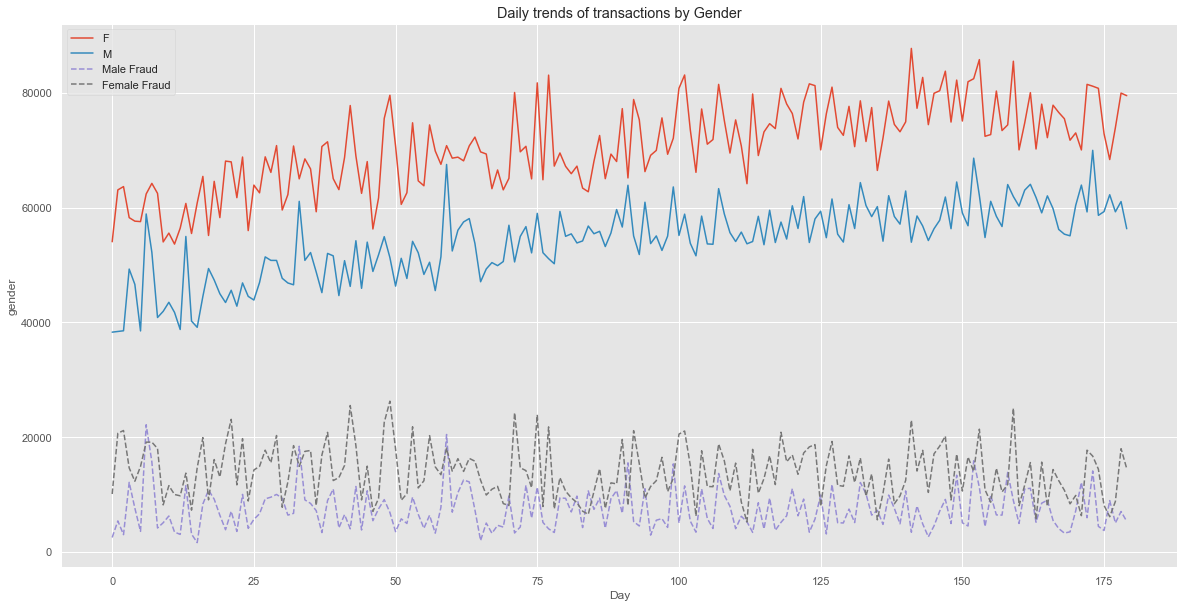

In [74]:
fraud_gender_m = customer_data[(customer_data['fraud'] == 1) & (customer_data['gender'] == 'F') ][['step','gender','amount']]
fraud_gender_f = customer_data[(customer_data['fraud'] == 1) & (customer_data['gender'] == 'M') ][['step','gender','amount']]
fraud_gender_f = fraud_gender_f.pivot_table(index = 'step', columns = 'gender',  aggfunc = 'sum')
fraud_gender_m = fraud_gender_m.pivot_table(index = 'step', columns = 'gender',  aggfunc = 'sum')
gender_transactions = customer_data.pivot_table(values = 'amount', index = 'step', columns = 'gender', aggfunc= 'sum')
gender_transactions = gender_transactions.iloc[:,[1,2]]
plt.figure(figsize=(20, 10))
plt.plot(gender_transactions)
plt.plot(fraud_gender_f,linestyle = '--')
plt.plot(fraud_gender_m, linestyle = '--')
plt.title('Daily trends of transactions by Gender')
plt.xlabel('Day')
plt.ylabel('gender')
plt.legend(['F','M','Male Fraud','Female Fraud'])
plt.show()




### 4 - Is there a specific ‘gender’ with a higher probability to be the victim of a fraudulent act ?

fraud,0,1,All
gender,,,
E,1171,7,1178
F,319807,4758,324565
M,265950,2435,268385
U,515,0,515
All,587443,7200,594643


Text(0.5, 1.0, 'Number of Fraud by gender')

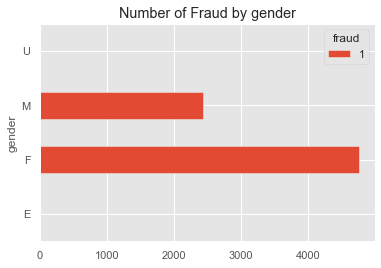

In [57]:
gender_table = pd.crosstab(customer_data.fraud, customer_data.gender, margins=True).T
display(gender_table)
gender_table.iloc[:-1,[1]].plot(kind='barh')
plt.title('Number of Fraud by gender')

By looking at the graph, you can see woman are more often victims of fraud, but we will need to do a hypotesis testing

In [58]:
display(gender_table)
print (" HO : The variables are independent \n")
print (" H1 : The variables are dependent \n")
stat, p, dof, expected = chi2_contingency(gender_table)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

fraud,0,1,All
gender,,,
E,1171,7,1178
F,319807,4758,324565
M,265950,2435,268385
U,515,0,515
All,587443,7200,594643


 HO : The variables are independent 

 H1 : The variables are dependent 

p value is 4.773245127492184e-80
Dependent (reject H0)


To confirm that women have the highest probability to be victims of frauds more often, we will use the bayesian formula to confirm our hypothesis.

In [59]:
gender_table['Percent'] = gender_table[1]/7200 
display(gender_table)
#
#Probabilty to be a woman and be victim of fraud
probability_female = customer_data[customer_data['gender'] == 'F'].shape[0]/ customer_data.shape[0]
probability_to_be_victim = 4758/7200
probability_to_be_victim_and_female = probability_female * probability_to_be_victim /(probability_female * probability_to_be_victim + (1-probability_female)*(1-probability_to_be_victim))
print("There's " ,np.round(probability_to_be_victim_and_female*100,2),"% probability that a customer victim of fraud knowing she's a women ")

fraud,0,1,All,Percent
gender,,,,
E,1171,7,1178,0.000972
F,319807,4758,324565,0.660833
M,265950,2435,268385,0.338194
U,515,0,515,0.000000
All,587443,7200,594643,1.000000


There's  70.07 % probability that a person can be victim of fraud knowing she's a women 


### 4 - Category of transactions with higher chance to be fraudulent ?

category
es_contents                 0.0
es_food                     0.0
es_transportation           0.0
es_fashion                116.0
es_barsandrestaurants     120.0
es_tech                   158.0
es_otherservices          228.0
es_hyper                  280.0
es_home                   302.0
es_leisure                474.0
es_hotelservices          548.0
es_travel                 578.0
es_wellnessandbeauty      718.0
es_health                1696.0
es_sportsandtoys         1982.0
All                      7200.0
Name: 1, dtype: float64

<AxesSubplot:ylabel='category'>

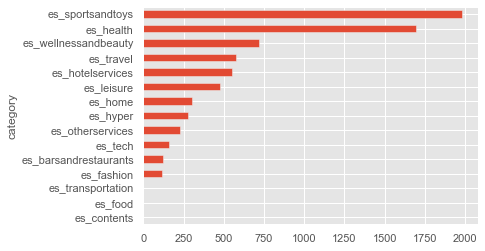

In [60]:
#Creating a pivot table for fraud and category
fraudulent_table = customer_data.pivot_table(index=["category"], columns = "fraud", values = 'customer', aggfunc = 'count',margins = True)
fraudulent_table= fraudulent_table.fillna(0).sort_values(by= 1)
display(fraudulent_table.iloc[:,1])
fraudulent_table.iloc[:-1,1].T.plot(kind='barh')


In [61]:
print (" HO : The variables are independent \n")
print (" H1 : The variables are dependent \n")
stat, p, dof, expected = chi2_contingency(fraudulent_table)
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

 HO : The variables are independent 

 H1 : The variables are dependent 

p value is 0.0
Dependent (reject H0)


In [77]:
probability_sport = customer_data[customer_data['category'] == 'es_sportsandtoys'].shape[0]/ customer_data.shape[0]
probability_to_be_victim = 1982/7200
probability_to_be_victim_and_sport = probability_sport * probability_to_be_victim /(probability_sport * probability_to_be_victim + (1-probability_sport)*(1-probability_to_be_victim))
print("There's a " ,probability_to_be_victim_and_sport,"% probability that a person can be a victim of fraud knowing the transaction was made in sport and toy category ")

There's a  0.0025670644571599665 % probability that a person can be a victim of fraud knowing the transaction was made in sport and toy category 


In [63]:
e = pd.crosstab(customer_data.step,customer_data.fraud, margins = True)
display(e)
e.iloc[:,1].value_counts()

fraud,0,1,All
step,,,
0,2390,40,2430
1,2384,40,2424
2,2422,40,2462
3,2459,40,2499
4,2492,40,2532
...,...,...,...
176,3681,40,3721
177,3718,40,3758
178,3703,40,3743


40      180
7200      1
Name: 1, dtype: int64

## Solutions and recommandations
### Solution 1: A machine learning model for fraud prediction.
#### Strengths: 
Speed: As the velocity of commerce is increasing, it’s very important to have a quicker solution to detect fraud. Machine learning can evaluate huge numbers of transactions in real time. It is continuously analyzing and processing new data. 

Scale:  Machine learning algorithms and models become more effective with increasing data sets. Once told which transactions are genuine and which are fraudulent, the systems can work through them and begin to pick out those which fit either bucket.

Efficiency: Contrary to humans, machines can perform repetitive tasks. ML can often be more effective than humans at detecting subtle or non-intuitive patterns to help identify fraudulent transactions.

#### Weaknesses: 

Lack of inspectability : Even the most advanced technology cannot replace the expertise and judgment it takes to effectively filter and process data and evaluate the meaning of the risk score. 
Cold start: It takes a significant amount of data for machine learning models to become accurate.
Blind to connections in data: Machine learning models work on actions, behavior, and activity. Initially, when the dataset is small, they are blind to connections in data.

#### Opportunities
Opportunity for the bank to be one step ahead of potential fraud cases. 
Opportunity for the bank to have a defense system that evolves and adapts to new types of fraud cases.

#### Threat 
There is always a risk that there will be fraud due to bias, the time it takes to adapt our program and the lack of human expertise. 



### Solution 2 :Optimize a highly secure mobile application and introduce a two-step authentication mechanism to ensure that each transaction originates from the card owner.
#### Strengths:
This allows cardholders to track the history of their transactions. 
 Allows the customer to directly report any irregularities 


#### Weaknesses : 
On the bank side, hire a programmer or a company to create the application. 
On the client side, it requires a phone connected to the internet. 

#### Opportunities: 
 The bank and the customer will always be in close communication. 
 Opportunity for the bank to regain the trust of its customers
 
#### Threats 
If the customer's phone is not protected the risk persists.
 Due to the fact that it is not the bank that is in charge of the application, there may be a delay in upgrading the application and therefore cases of fraud in the meantime.




###  5 -What are your recommendations to the bank's management and describe how your solution will help regain trust from customers?



All the solutions we have proposed will allow the bank to be in close communication with its customers, and it is only through communication and the right decisions for their security that the bank's customers can regain their trust. 

 Knowing that the customers will be at the heart of all transactions and will be able to monitor permanently with their mobile application any transaction on their credit card and the bank will make sure to implement thanks to artificial intelligence one more defense to counteract fraudulent transactions.


### 6 - Any other data that you would ask the team to provide? Why?